# APS1070
#### Linear Regression - Project 4

Please fill out the following:


*   Your **name**: xujunxi
*   Your **student number**: 1004532151



## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. (Optional) Replicate Linear Regression code on a blank notebook, without viewing this code. [This is called retrieval practice.](https://www.learningscientists.org/blog/2016/6/23-1)
4. Complete exercises.

## Linear Regression - Introduction

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = mX + c$

This is the equation for a line that you studied in high school. m is the slope of the line and c is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Are we always fitting a line into the data? What if we have more than 1 feature (independant variable)?

The vectorized form of above equation is written as $y = Xw$, where y and w are vectors while X is a matrix. 

Where is the c term? It is included within the X matrix.

**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:

<img src="https://miro.medium.com/max/313/1*A32yDrkQKIU0Z-Nf7JD9Pg.png">

- Y is the predicted value ($h_\theta(x)$)
- θ₀ is the bias term.
- θ₁,…,θn are the model parameters
- x₁, x₂,…,xn are the feature values.

### LR - Procedure

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:

<img src="https://miro.medium.com/max/300/1*_y5QA1yF4w6LDDRxfTt6GA.jpeg">

Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ from $y = mX + c$:

<img src="https://miro.medium.com/max/400/1*3cpC7oHy4IbH3o3Jc-ygVw.jpeg">

Partial Derivative of the above equation with respect to m is shown as $D_m$:

<img src="https://miro.medium.com/max/400/1*FvYfCBrl2gX9K-KxSO1eIw.jpeg">

While the Partial Derivative with respect to c is shown as $D_c$:

<img src="https://miro.medium.com/max/300/1*rj09w2TcBxnHPtQ0oq4ehA.jpeg">

#### Analytical Approach for Linear Regression

Can you derive the Analytical Solution for Linear Regression?

We arrive at the analytical solution when we turn the partial derivatives with respect to the parameters to zero. Why?

This is because at the point where cost function is at the minimum with respect to the parameters (m and c), the derivative of cost function with respect to the parameters would be zero.

$D_m=0$ and $D_c=0$

The solution for the general case comes out to be:

<img src="https://sebastianraschka.com/images/faq/closed-form-vs-gd/closed-form.png">

With $L_2$ Regularization. Cost:

$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$

$w = (X^TX + \lambda I)^{-1}X^Ty$

#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters m and c. 

<img src="https://miro.medium.com/max/300/1*JDcHqFK8jLcgQu1cj2XuVQ.jpeg">

Here the term $L$ is defined as the learning rate.

<img src="https://miro.medium.com/max/864/1*CjTBNFUEI_IokEOXJ00zKw.gif">

#### Any other solutions methods?

Some other solution methods are QR Decomposition, Singular-Value Decomposition.

- Do these methods give exact solutions?
- Do these methods scale well with large datasets?

## Let's Start

Single Feature, 5 data points.

### Analytical Approach in Code

Let's get our hands dirty.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [0]:
n = 5 # number of points
m = 2 # slope of line
c = 4 # y intercept of line
r = 2 # range of data on x-axis

np.random.seed(2)
x = r * np.random.rand(n)
x.sort()
yPerf = m*x + c # perfect world: no noise
y = m*x + c + np.random.randn(n) # imperfect world: we get noisy data

In [0]:
x

array([0.05185246, 0.8407356 , 0.87064479, 0.8719898 , 1.09932496])

Spoiler Alert: We are in an Imperfect World.

In [0]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

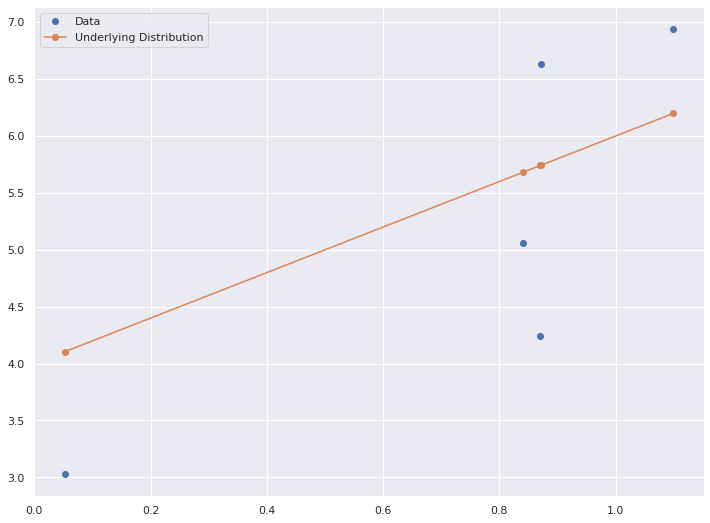

In [0]:
plt.plot(x, y, 'o', label='Data')
plt.plot(x, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
x = np.vstack((np.ones(np.shape(x)), x)).T
y = y.reshape(-1, 1)

In [0]:
x

array([[1.        , 0.05185246],
       [1.        , 0.8407356 ],
       [1.        , 0.87064479],
       [1.        , 0.8719898 ],
       [1.        , 1.09932496]])

In [0]:
y

array([[3.02924941],
       [5.0642481 ],
       [4.2402827 ],
       [6.63756941],
       [6.93819559]])

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

# prediction
yPred = np.dot(x, w)

In [0]:
np.dot(x.T, x)

array([[5.        , 3.73454761],
       [3.73454761, 3.43642895]])

In [0]:
w

array([[2.67741212],
       [3.35314632]])

In [0]:
w[0], w[1]

(array([2.67741212]), array([3.35314632]))

- How similar are these to the values we had set initially?
- Will they be same as those set initially if there was no noise?

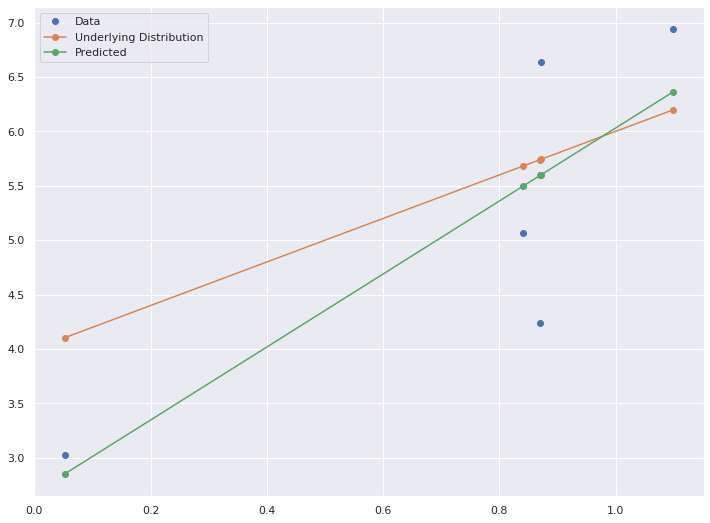

In [0]:
plt.plot(x[:, 1], y, 'o', label='Data')
plt.plot(x[:, 1], yPerf, 'o-', label='Underlying Distribution')
plt.plot(x[:, 1], yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  0.8321853483360432


### Complex Dependant Variable

It's complicated.

In [0]:
n = 20 # number of points
m = 3  # slope of line
c = 10 # y intercept of line
r = 2  # range of data on x-axis

np.random.seed(10)
X = xD = r * np.random.randn(n) # points also stored in xD (xData). will be useful later.
X.sort()
yPerf = X - 2 * (X ** 2) + 0.5 * (X ** 3)
np.random.seed(10)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(0, 5, n) # imperfect world: we get noisy data

In [0]:
X

array([-3.09080058, -2.27320442, -2.15960977, -1.93013134, -1.44017112,
       -0.34920042, -0.0167677 ,  0.00858286,  0.21709705,  0.27027376,
        0.45726026,  0.53102317,  0.86605238,  0.89027523,  1.24267195,
        1.43055795,  2.05654816,  2.40607475,  2.66317301,  2.969074  ])

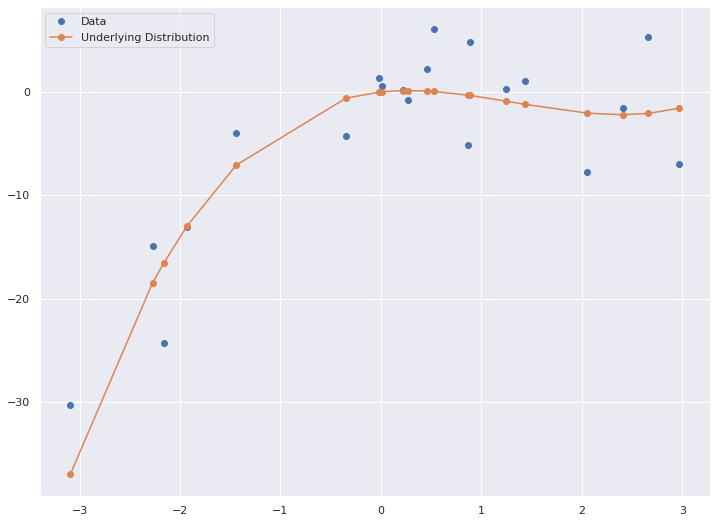

In [0]:
plt.plot(X, y, 'o', label='Data')
plt.plot(X, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
X = np.vstack((np.ones(np.shape(X)), X)).T
y = y.reshape(-1, 1)

In [0]:
X

array([[ 1.        , -3.09080058],
       [ 1.        , -2.27320442],
       [ 1.        , -2.15960977],
       [ 1.        , -1.93013134],
       [ 1.        , -1.44017112],
       [ 1.        , -0.34920042],
       [ 1.        , -0.0167677 ],
       [ 1.        ,  0.00858286],
       [ 1.        ,  0.21709705],
       [ 1.        ,  0.27027376],
       [ 1.        ,  0.45726026],
       [ 1.        ,  0.53102317],
       [ 1.        ,  0.86605238],
       [ 1.        ,  0.89027523],
       [ 1.        ,  1.24267195],
       [ 1.        ,  1.43055795],
       [ 1.        ,  2.05654816],
       [ 1.        ,  2.40607475],
       [ 1.        ,  2.66317301],
       [ 1.        ,  2.969074  ]])

In [0]:
y

array([[-30.30224812],
       [-14.90507085],
       [-24.25055748],
       [-13.01812698],
       [ -3.97520129],
       [ -4.21480101],
       [  1.31022556],
       [  0.55117848],
       [  0.14940796],
       [ -0.73895164],
       [  2.25202089],
       [  6.05710927],
       [ -5.13457955],
       [  4.79927727],
       [  0.25684333],
       [  1.02706952],
       [ -7.73627111],
       [ -1.53201346],
       [  5.34514167],
       [ -6.97396317]])

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPredLinear = yPred = np.dot(X, w)

w

array([[-5.45917353],
       [ 3.82202654]])

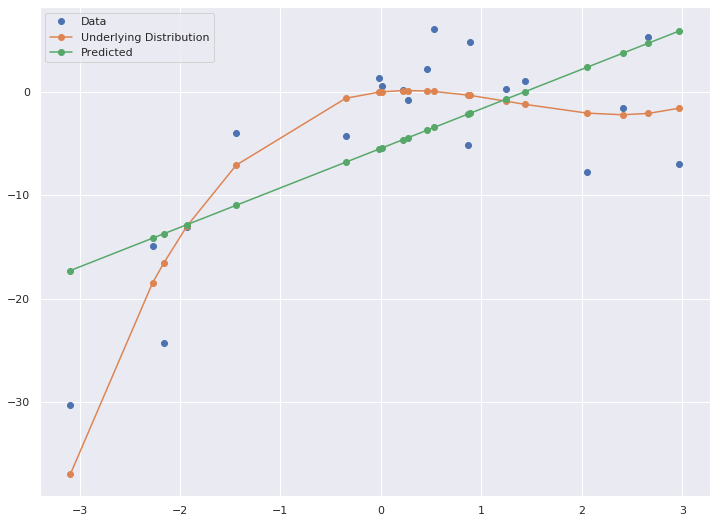

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  6.839531223681816


#### What to do next?

Can we add more features.

In [0]:
X

array([[ 1.        , -3.09080058],
       [ 1.        , -2.27320442],
       [ 1.        , -2.15960977],
       [ 1.        , -1.93013134],
       [ 1.        , -1.44017112],
       [ 1.        , -0.34920042],
       [ 1.        , -0.0167677 ],
       [ 1.        ,  0.00858286],
       [ 1.        ,  0.21709705],
       [ 1.        ,  0.27027376],
       [ 1.        ,  0.45726026],
       [ 1.        ,  0.53102317],
       [ 1.        ,  0.86605238],
       [ 1.        ,  0.89027523],
       [ 1.        ,  1.24267195],
       [ 1.        ,  1.43055795],
       [ 1.        ,  2.05654816],
       [ 1.        ,  2.40607475],
       [ 1.        ,  2.66317301],
       [ 1.        ,  2.969074  ]])

In [0]:
xD

array([-3.09080058, -2.27320442, -2.15960977, -1.93013134, -1.44017112,
       -0.34920042, -0.0167677 ,  0.00858286,  0.21709705,  0.27027376,
        0.45726026,  0.53102317,  0.86605238,  0.89027523,  1.24267195,
        1.43055795,  2.05654816,  2.40607475,  2.66317301,  2.969074  ])

In [0]:
X = np.vstack((X.T, xD**2, xD**3)).T

In [0]:
X

array([[ 1.00000000e+00, -3.09080058e+00,  9.55304825e+00,
        -2.95265671e+01],
       [ 1.00000000e+00, -2.27320442e+00,  5.16745835e+00,
        -1.17466892e+01],
       [ 1.00000000e+00, -2.15960977e+00,  4.66391437e+00,
        -1.00722350e+01],
       [ 1.00000000e+00, -1.93013134e+00,  3.72540699e+00,
        -7.19052480e+00],
       [ 1.00000000e+00, -1.44017112e+00,  2.07409286e+00,
        -2.98704864e+00],
       [ 1.00000000e+00, -3.49200421e-01,  1.21940934e-01,
        -4.25818256e-02],
       [ 1.00000000e+00, -1.67676999e-02,  2.81155758e-04,
        -4.71433537e-06],
       [ 1.00000000e+00,  8.58286187e-03,  7.36655178e-05,
         6.32260964e-07],
       [ 1.00000000e+00,  2.17097051e-01,  4.71311297e-02,
         1.02320293e-02],
       [ 1.00000000e+00,  2.70273757e-01,  7.30479037e-02,
         1.97429314e-02],
       [ 1.00000000e+00,  4.57260260e-01,  2.09086946e-01,
         9.56071512e-02],
       [ 1.00000000e+00,  5.31023171e-01,  2.81985609e-01,
      

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred4Feature = yPred = np.dot(X, w)

In [0]:
w

array([[ 0.04177438],
       [ 2.58652514],
       [-1.87142105],
       [ 0.19655185]])

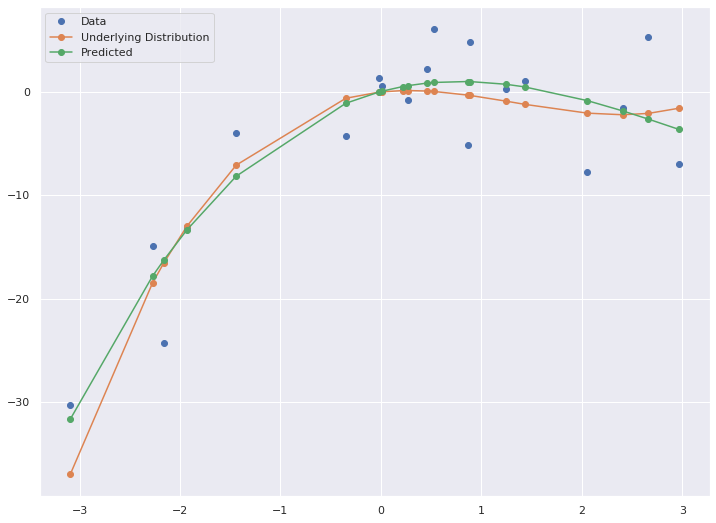

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.929493007090521


But how do we know when to stop, since we would not be knowing when to stop adding features in x.

In [0]:
X = np.vstack((X.T, xD**4, xD**5, xD**6, xD**7)).T

In [0]:
X.shape

(20, 8)

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred8Feature = yPred = np.dot(X, w)

In [0]:
w

array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

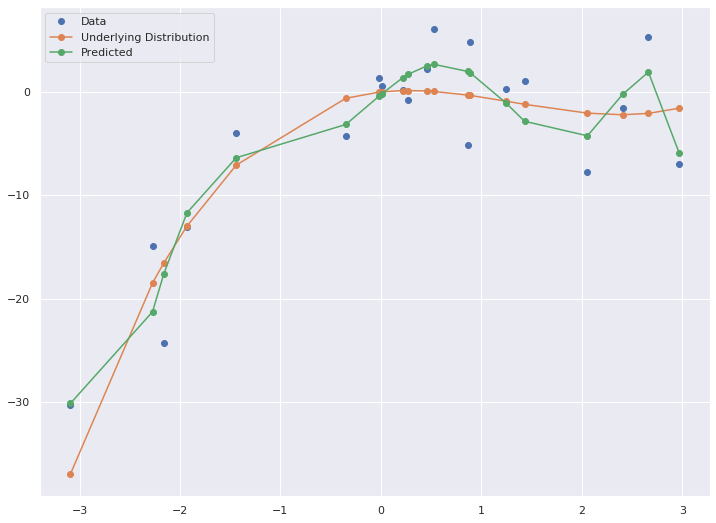

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.3097843019929725


Even though RMSE here (with much more higher features) is lower than previous case, we can see this Predicted Line is quite far from the Underlying distribution. This is called **Overfitting**.

**When does the model overfits: when we have more features or comparitively less data for the model.**

What exactly is overfitting:
It pays more attention to the noise of the data provided, in a sense trying to rotely memorize everything, 
without generalizing. 

Since we don't know when to stop adding features, what can be done:
- Solution is to work with a model or feature set that can slightly overfit your data, and then use techniques to prevent overfitting from happening.
The alternative gives us underfitting which we cannot fix unless you modify the feature set or model.

Options we have to prevent overfitting. Well there are many, most widely used ones are
- Using a validation set
- Regularization: add penalty on weights

In [0]:
λ = 10 # what is lambda: regularization parameter
f = 8 # number of features

In [0]:
np.identity(f)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X) + (λ)*np.identity(f)), np.dot(X.T, y))

# prediction
yPred8FeatRegu = yPred = np.dot(X, w)
w

array([[ 0.21326186],
       [ 0.40727946],
       [-0.46745243],
       [-0.31891582],
       [-0.51080301],
       [ 0.38864889],
       [ 0.03613141],
       [-0.03367748]])

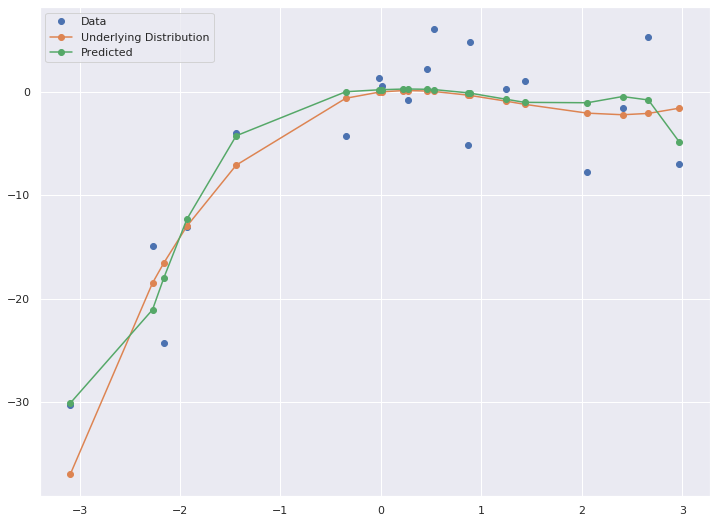

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

Can we know from the plot if the value of λ is optimal:

Somewhat but not exactly. 

To get the exact value of lambda you need to split dataset between training and testing. Then cycle over multiple values of lambda. The most optimum is the one which gives the lowest test error. 

What does low test error represent?

All models together:

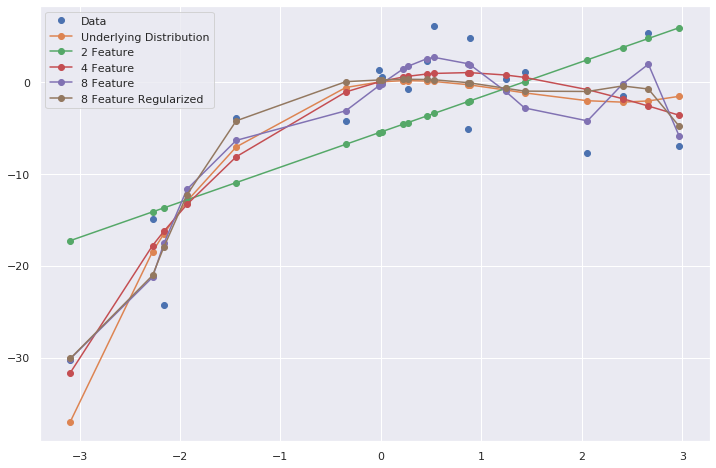

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPredLinear, 'o-', label='2 Feature')
plt.plot(xD, yPred4Feature, 'o-', label='4 Feature')
plt.plot(xD, yPred8Feature, 'o-', label='8 Feature')
plt.plot(xD, yPred8FeatRegu, 'o-', label='8 Feature Regularized')

plt.legend()
plt.show()

### Further Complex Multivariate Data

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [0]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that the target value by the name MEDV is missing from the dataframe. It is present in dataset.target.
Let's add that to the df.

In [0]:
df['MEDV'] = dataset.target

Are there any null values in the dataset?

In [0]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [0]:
df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

Even though there are none, it's a good practice to check.

#### Exploratory Data Analysis

We here use distplot method from the seaborn library, which is another popular graphing library for Python.

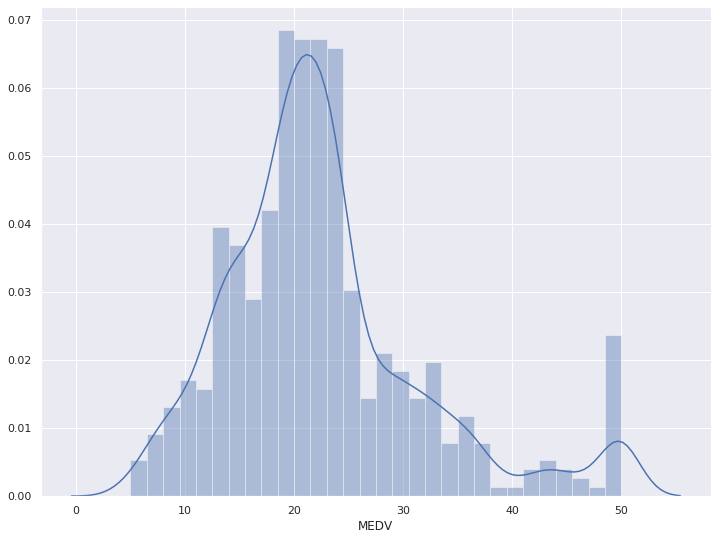

In [0]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We can see that it mostly normally distributed with a few outliers.

## Linear Regression - Assignment

We'll work with the above dataset for the assignment below. Create a blank notebook for the assignment.

### Question 1

1. Normalize the data using StandardScaler from sklearn. [0.5]
2. Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer. [1]
3. What is the best lambda where the best fit occurs? Use this best lambda from here on out. [Note: You may be surprised by the best lambda here - this won't be the case for all datasets.] [1]

#### Q1.1

In [0]:
X = df.iloc[:,:-1]
y = df['MEDV']

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

In [0]:
X_train[1]

array([-0.39709866, -0.49960763, -0.04487755, -0.27288841, -1.24185891,
       -0.49118121, -1.8355285 ,  0.73005474, -0.62464765, -0.57337637,
        0.33649132,  0.20501196, -0.38768057])

In [0]:
X_train = np.append(arr=np.ones((X_train.shape[0],1)),values= X_train ,axis = 1)  #add an "1" column to X
X_validation = np.append(arr=np.ones((X_validation.shape[0],1)),values= X_validation ,axis = 1)

In [0]:
X_train[1]

array([ 1.        , -0.39709866, -0.49960763, -0.04487755, -0.27288841,
       -1.24185891, -0.49118121, -1.8355285 ,  0.73005474, -0.62464765,
       -0.57337637,  0.33649132,  0.20501196, -0.38768057])

In [0]:
y_train = y_train.values.reshape(-1,1)
y_validation = y_validation.values.reshape(-1,1)

#### Q1.2

The cost we use here is MSE/2 because the cost function with L2 regularization is $J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$. If we only include the MSE part, so the cost function is MSE/2. (Because the cost function has 1/2m instead of 1/m and MSE function only divide by m). But professor said we can either divide by 2 or not.

In [0]:
def L2_cost(yPred, y):
  return (mean_squared_error(yPred, y))/2

In [0]:
f = 14 #number of features
train_error_list = []
validation_error_list = []
λ_list = []
for λ in range (0,101):
  w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (λ)*np.identity(f)), np.dot(X_train.T, y_train))
  yPred_train = np.dot(X_train,w)
  train_error = L2_cost(yPred_train, y_train)
  train_error_list.append(train_error)
  yPred_validation = np.dot(X_validation,w)
  validation_error = L2_cost(yPred_validation, y_validation)
  validation_error_list.append(validation_error)
  λ_list.append(λ)

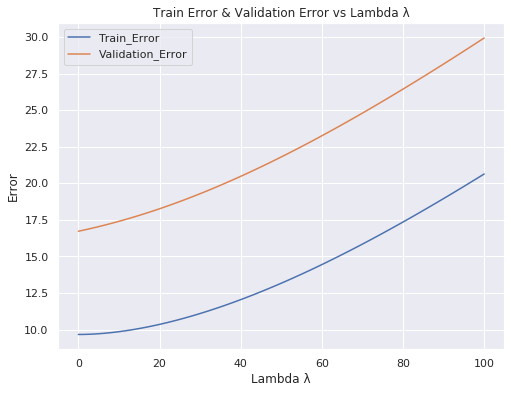

In [0]:
plt.figure(figsize=(8,6)) 
plt.plot(λ_list,train_error_list,label='Train_Error')
plt.plot(λ_list,validation_error_list,label='Validation_Error')
plt.title('Train Error & Validation Error vs Lambda λ')
plt.ylabel('Error')
plt.xlabel('Lambda λ')
plt.legend()
plt.show()

#### Q1.3

The best lambda is 0 where the best fit occurs. (When lambda is 0, the error is minimal)
We use lambda = 0 for the following questions.

### Question 2

1. Derive the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$. Show your work (either by using in-line equations like we do here, or taking a picture of your work, and emdedding it in the notebook). [1]

<img src="https://drive.google.com/uc?authuser=0&id=1KIGOzMYQP7J5TAegRHUJ2IweFtRlrU88&export=download">

### Question 3

1. Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2. [1.5]

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda. [1]

#### Q3.1

In [0]:
X_train.shape

(404, 14)

In [0]:
def batch_gradient_descent(X, y):
  m,n = X.shape
  learning_rate = 0.01
  #w_GD = np.zeros(14).reshape(-1,1)
  np.random.seed(42)
  w_GD = np.random.randn(n,1)
  cost = float('inf')
  iteration_count = 0
  cost_list = []
  iteration_list = []
  while True: #Use while loop here to see when the cost reaches the minimum point
    cost_saved = cost
    hypothesis = np.dot(X, w_GD)
    loss = hypothesis - y
    gradient = np.dot(X.T,loss) / m
    w_GD = w_GD - learning_rate * gradient
    cost = (mean_squared_error(np.dot(X, w_GD),y))/2
    iteration_count += 1
    iteration_list.append(iteration_count)
    cost_list.append(cost)
    if (cost > cost_saved):
      saved_w_GD = w_GD
      break  
  return cost_list, iteration_list, saved_w_GD

In [0]:
cost_iteration = batch_gradient_descent(X_train, y_train)

In [0]:
cost_iteration[2]

array([[22.61188119],
       [-0.97081989],
       [ 1.0571482 ],
       [ 0.03830926],
       [ 0.59450666],
       [-1.85514714],
       [ 2.57321972],
       [-0.08761572],
       [-2.88094259],
       [ 2.11224134],
       [-1.87532671],
       [-2.29276717],
       [ 0.71817939],
       [-3.59245469]])

In [0]:
len(cost_iteration[1])

19649

We can see that the cost keeps going down until 19649 epochs then starts to go up. But from the plot below we can see that the cost decreases by a very small amount from about 400 epochs.

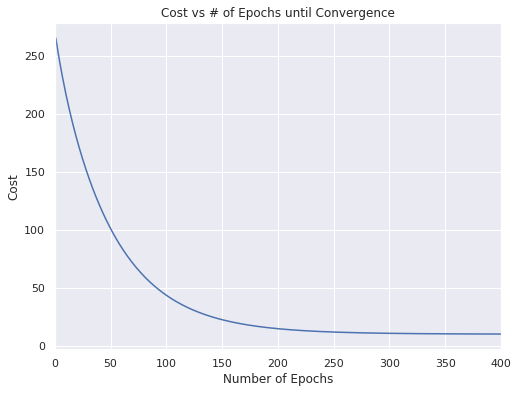

In [0]:
plt.figure(figsize=(8,6))
plt.plot(cost_iteration[1],cost_iteration[0])
plt.title('Cost vs # of Epochs until Convergence')
plt.ylabel('Cost')
plt.xlabel('Number of Epochs')
plt.xlim(0,400)
plt.show()

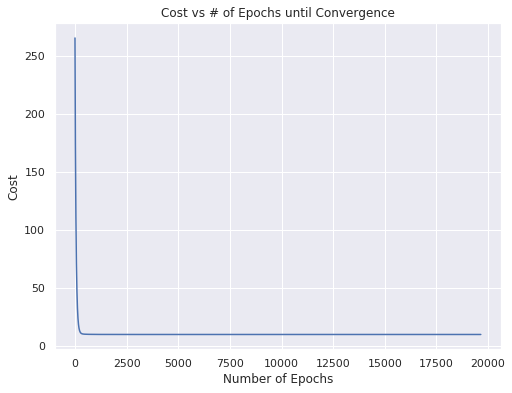

In [0]:
plt.figure(figsize=(8,6))
plt.plot(cost_iteration[1],cost_iteration[0])
plt.title('Cost vs # of Epochs until Convergence')
plt.ylabel('Cost')
plt.xlabel('Number of Epochs')
plt.show()

#### Q3.2

In [0]:
w_analytical = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))

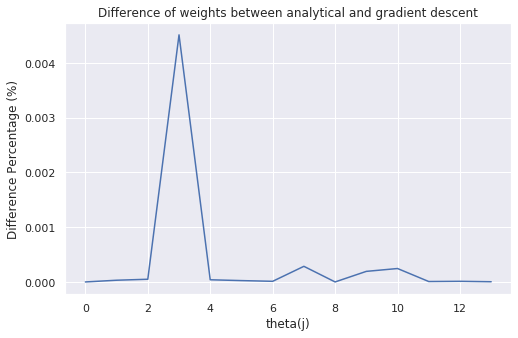

In [0]:
Difference_percentage = (abs(cost_iteration[2]-w_analytical)/abs(w_analytical))*100
plt.figure(figsize=(8,5))
plt.plot(list(range(0,14)),Difference_percentage)
plt.title('Difference of weights between analytical and gradient descent')
plt.xlabel('theta(j)')
plt.ylabel('Difference Percentage (%)')
plt.show()

When we use the weight at the point where the cost is minimal to compare with the analytical weight, we can see that the difference is very small. The X-axis shows each theta values and the y-axis shows the corresponding differences.(Professor said it is ok compare these two weights.)

### Question 4

1. Plot training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line. [1]

For very low $\eta$, gradient descent should be slow to converge.  For very high $\eta$, the error might be very unstable (i.e., not decreasing on every epoch).

In [0]:
def batch_gradient_descent_2(X, y):
  training_error_list_all = []
  for learning_rate in [0.1,0.01,0.001,0.0001,0.00001,0.000001]:
    training_error_list = []
    #w_GD = np.zeros(14).reshape(-1,1)
    m,n = X.shape
    np.random.seed(42)
    w_GD = np.random.randn(n,1)
    for iteration in range(0,1000):
      hypothesis = np.dot(X, w_GD)
      loss = hypothesis - y
      gradient = np.dot(X.T,loss) / m
      w_GD = w_GD - learning_rate * gradient
      training_error = (mean_squared_error(np.dot(X, w_GD),y))/2
      training_error_list.append(training_error)
    training_error_list_all.append(training_error_list)
  return training_error_list_all

In [0]:
train_error_iteration2 = batch_gradient_descent_2(X_train, y_train)

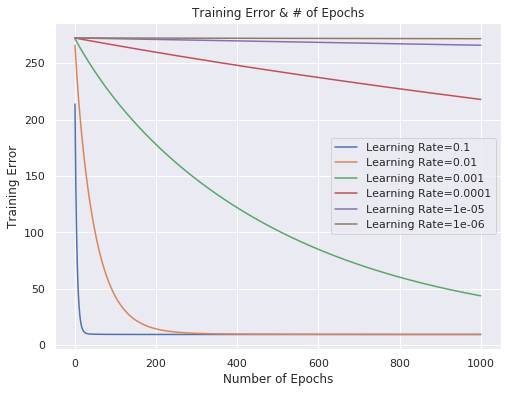

In [0]:
epoch_list = list(range(1,1001))
learning_rate = [0.1,0.01,0.001,0.0001,0.00001,0.000001]
plt.figure(figsize=(8,6))
for i in range(6):
  plt.plot(epoch_list ,train_error_iteration2[i],label='Learning Rate='+str(learning_rate[i]))
plt.legend()
plt.title('Training Error & # of Epochs')
plt.ylabel('Training Error')
plt.xlabel('Number of Epochs')
plt.show()

### Question 5

**Implement a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.**  

1. Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]

2. All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1]

#### Q5.1

In [0]:
import time

In [0]:
def mini_batch(X, y, bs):
  iterations = 20
  learning_rate = 0.01
  m, n = X.shape
  np.random.seed(42)
  w_GD = np.random.randn(n,1) #14x1
  cost_list = np.zeros(iterations)
  graduate_update_list = []
  time_list = np.zeros(iterations)
  iteration_list = []
  sum_time = 0
  
  for i in range(iterations): #20 iterations
    start = time.clock()
    index = np.random.permutation(m)
    X_random = X[index]
    y_random = y[index]
    iteration_list.append(i)
    count = 0
    
    for j in range(0, m, bs): #range(a,b,c): Generates a sequence of numbers from a to b excluding b, incrementing by c.
      X_batch = X_random[j:j+bs] #16x14
      y_batch = y_random[j:j+bs] #16x1
      hypothesis = np.dot(X_batch, w_GD) #16x1
      loss = hypothesis - y_batch #16x1
      gradient = np.dot(X_batch.T,loss) / (len(X_batch)) #14x1
      w_GD = w_GD - learning_rate * gradient
      count += 1

    count_update = count * (i+1)
    graduate_update_list.append(count_update)
    cost = mean_squared_error(np.dot(X, w_GD),y)/2
    end = time.clock()
    wall_clock_time = end - start
    sum_time += wall_clock_time
    cost_list[i] = cost
    time_list[i] = sum_time

  return cost_list, time_list, graduate_update_list, iteration_list

In [0]:
BZ1 = mini_batch(X_train, y_train, 1)
BZ16 = mini_batch(X_train, y_train, 16)
BZ128 = mini_batch(X_train, y_train, 128)
BZ256 = mini_batch(X_train, y_train, 256)
BZ404 = mini_batch(X_train, y_train, 404)

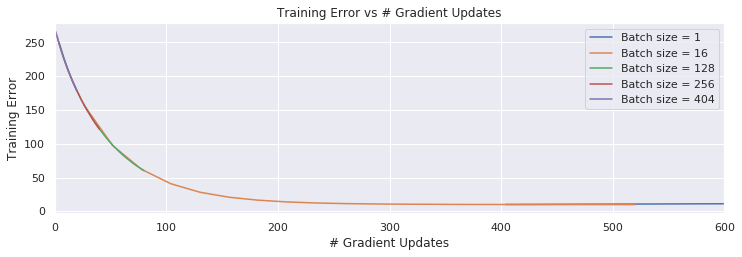

In [0]:
plt.figure(figsize=(12,3.5))
plt.plot(BZ1[2],BZ1[0],label='Batch size = 1')
plt.plot(BZ16[2],BZ16[0],label='Batch size = 16')
plt.plot(BZ128[2],BZ128[0],label='Batch size = 128')
plt.plot(BZ256[2],BZ256[0],label='Batch size = 256')
plt.plot(BZ404[2],BZ404[0],label='Batch size = 404')
plt.xlim(0,600)
plt.legend()
plt.title('Training Error vs # Gradient Updates')
plt.ylabel('Training Error')
plt.xlabel('# Gradient Updates')
plt.show()

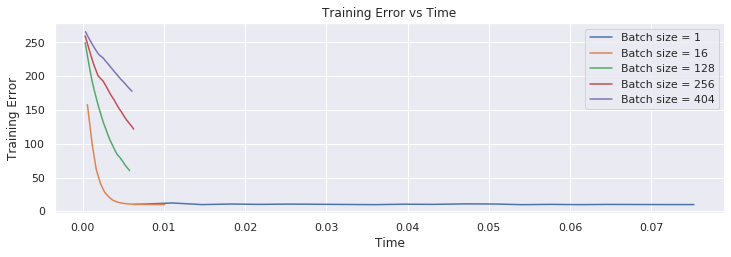

In [0]:
plt.figure(figsize=(12,3.5))
plt.plot(BZ1[1],BZ1[0],label='Batch size = 1')
plt.plot(BZ16[1],BZ16[0],label='Batch size = 16')
plt.plot(BZ128[1],BZ128[0],label='Batch size = 128')
plt.plot(BZ256[1],BZ256[0],label='Batch size = 256')
plt.plot(BZ404[1],BZ404[0],label='Batch size = 404')
#plt.xlim(0,0.07)
plt.legend()
plt.title('Training Error vs Time')
plt.ylabel('Training Error')
plt.xlabel('Time')
plt.show()

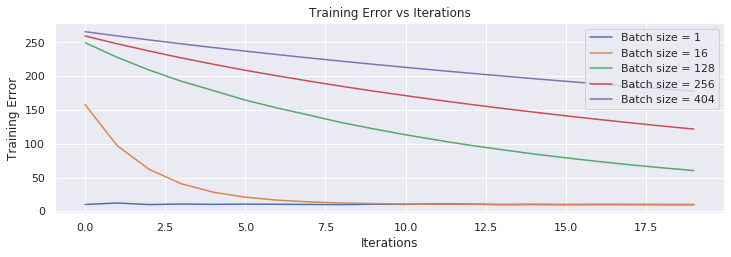

In [0]:
plt.figure(figsize=(12,3.5))
plt.plot(BZ1[3],BZ1[0],label='Batch size = 1')
plt.plot(BZ16[3],BZ16[0],label='Batch size = 16')
plt.plot(BZ128[3],BZ128[0],label='Batch size = 128')
plt.plot(BZ256[3],BZ256[0],label='Batch size = 256')
plt.plot(BZ404[3],BZ404[0],label='Batch size = 404')
#plt.xlim(0,20)
plt.legend()
plt.title('Training Error vs Iterations')
plt.ylabel('Training Error')
plt.xlabel('Iterations')
plt.show()

#### Q5.2

In terms of # of gradient updates, B=16 leads to fastest convergence because when iterations = 20, B=404, B=256 and B=128 cannot converge since there are not enough iterations to update the weight and the training error. If we increase the number of iterations, we can see the training errror will still go down for these sizes. Also, for B=1, which comes to the stochastic gradient descent, we updated the cost only after updating the weight 404 times. Therefore, when we compute the first error, the weight has been updated 404 times so the cost has already reached the minimum point. Since it takes longer to get this point, as the plot shown above, we can say that when B=16 converges faster(about 200 to 300 gradient updates). In terms of "wall-clock time", it is similar. B=16 leads to fastest convergence. (B=404, B=256, B=128 have not converged yet and B=1 starts at the min point but takes longer according to the plot above.)

### Question 6

1. Switch to absolute error for loss but still use $L_2$ regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5]


2. Tune $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).  Is it easier to train with squared error or absolute error, why?  Show some plots that help you demonstrate this point and explain. [1]

#### Q6.1

<img src="https://drive.google.com/uc?authuser=0&id=1jwwo0MqGVIGvUROwoxenI57wRRxHH1HH&export=download">

#### Q6.2

We will try 3 different learning rates and see which one performs best.

In [0]:
def mini_batch_lr(X, y, bs):
  iterations = 20
  m, n = X.shape
  cost_big_list = []
  graduate_update_big_list = []
  time_big_list = []
  iteration_big_list = []
  for learning_rate in [0.001, 0.01, 0.02]: # tune learning rate with different values, 0.001, 0.01, 0.02.
    cost_list = np.zeros(iterations)
    graduate_update_list = []
    time_list = np.zeros(iterations)
    iteration_list = []
    sum_time = 0
    np.random.seed(42)
    w_GD = np.random.randn(n,1) #14x1
    for i in range(iterations): #20 iterations
      start = time.clock()
      index = np.random.permutation(m)
      X_random = X[index]
      y_random = y[index]
      iteration_list.append(i)
      count = 0
    
      for j in range(0, m, bs): #range(a,b,c): Generates a sequence of numbers from a to b excluding b, incrementing by c.
        X_batch = X_random[j:j+bs] #16x14
        y_batch = y_random[j:j+bs] #16x1
        hypothesis = np.dot(X_batch, w_GD) #16x1
        loss = hypothesis - y_batch #16x1
        gradient = np.dot(X_batch.T, (loss/np.abs(loss)))/(2*len(X_batch)) #14x1
        w_GD = w_GD - learning_rate * gradient
        count += 1

      count_update = count * (i+1)
      graduate_update_list.append(count_update)
      #cost = mean_absolute_error(np.dot(X, w_GD),y)/2
      cost = mean_squared_error(np.dot(X, w_GD),y)/2
      end = time.clock()
      wall_clock_time = end - start
      sum_time += wall_clock_time
      cost_list[i] = cost
      time_list[i] = sum_time
    cost_big_list.append(cost_list)
    graduate_update_big_list.append(graduate_update_list)
    time_big_list.append(time_list)
    iteration_big_list.append(iteration_list)
  
  return cost_big_list, time_big_list, graduate_update_big_list, iteration_big_list

In [0]:
BZ1_absolute_error = mini_batch_lr(X_train, y_train, 1)
BZ16_absolute_error = mini_batch_lr(X_train, y_train, 16)
BZ128_absolute_error = mini_batch_lr(X_train, y_train, 128)
BZ256_absolute_error = mini_batch_lr(X_train, y_train, 256)
BZ404_absolute_error = mini_batch_lr(X_train, y_train, 404)

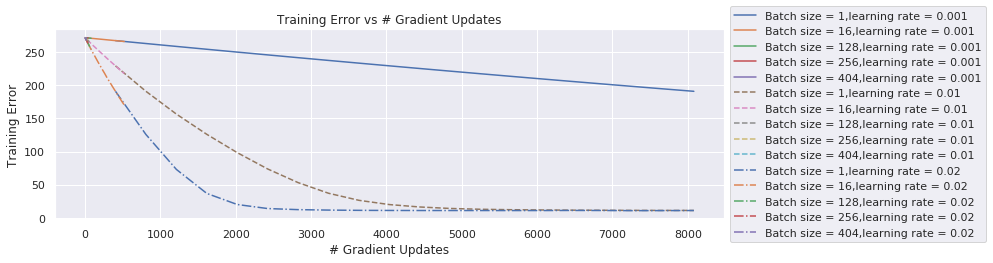

In [0]:
plt.figure(figsize=(12,3.5))
for i in range(0,3):
  linestyles = ['-', '--', '-.'] ### '-': learning_rate = 0.001, '--': learning_rate = 0.01, '-.': learning_rate = 0.02
  lr = ['0.001','0.01','0.02']
  plt.plot(BZ1_absolute_error[2][i],BZ1_absolute_error[0][i],label='Batch size = 1,learning rate = {}'.format(lr[i]),linestyle=linestyles[i])
  plt.plot(BZ16_absolute_error[2][i],BZ16_absolute_error[0][i],label='Batch size = 16,learning rate = {}'.format(lr[i]),linestyle=linestyles[i])
  plt.plot(BZ128_absolute_error[2][i],BZ128_absolute_error[0][i],label='Batch size = 128,learning rate = {}'.format(lr[i]),linestyle=linestyles[i])
  plt.plot(BZ256_absolute_error[2][i],BZ256_absolute_error[0][i],label='Batch size = 256,learning rate = {}'.format(lr[i]),linestyle=linestyles[i])
  plt.plot(BZ404_absolute_error[2][i],BZ404_absolute_error[0][i],label='Batch size = 404,learning rate = {}'.format(lr[i]),linestyle=linestyles[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Training Error vs # Gradient Updates')
plt.ylabel('Training Error')
plt.xlabel('# Gradient Updates')
plt.show()

We tried 3 learning rates: 0.001, 0.01, 0.02 and we can see that when learning rate = 0.02, convergence is the fastest. So we use learning rate=0.02 (with the absolute error loss function). Next, we will visualize the 3 plots when learning rate = 0.02, using the absolute error loss function.

In [0]:
def mini_batch2(X, y, bs):
  iterations = 20
  learning_rate = 0.02
  m, n = X.shape
  np.random.seed(42)
  w_GD = np.random.randn(n,1) #14x1
  cost_list = np.zeros(iterations)
  graduate_update_list = []
  time_list = np.zeros(iterations)
  iteration_list = []
  sum_time = 0
  
  for i in range(iterations): #20 iterations
    start = time.clock()
    index = np.random.permutation(m)
    X_random = X[index]
    y_random = y[index]
    iteration_list.append(i)
    count = 0
    
    for j in range(0, m, bs): #range(a,b,c): Generates a sequence of numbers from a to b excluding b, incrementing by c.
      X_batch = X_random[j:j+bs] #16x14
      y_batch = y_random[j:j+bs] #16x1
      hypothesis = np.dot(X_batch, w_GD) #16x1
      loss = hypothesis - y_batch #16x1
      gradient = np.dot(X_batch.T, (loss/np.abs(loss)))/(2*len(X_batch)) #14x1
      w_GD = w_GD - learning_rate * gradient
      count += 1

    count_update = count * (i+1)
    graduate_update_list.append(count_update)
    #cost = mean_absolute_error(np.dot(X, w_GD),y)/2
    cost = mean_squared_error(np.dot(X, w_GD),y)/2
    end = time.clock()
    wall_clock_time = end - start
    sum_time += wall_clock_time
    cost_list[i] = cost
    time_list[i] = sum_time


  return cost_list, time_list, graduate_update_list, iteration_list

In [0]:
BZ1_absolute_error = mini_batch2(X_train, y_train, 1)
BZ16_absolute_error = mini_batch2(X_train, y_train, 16)
BZ128_absolute_error = mini_batch2(X_train, y_train, 128)
BZ256_absolute_error = mini_batch2(X_train, y_train, 256)
BZ404_absolute_error = mini_batch2(X_train, y_train, 404)

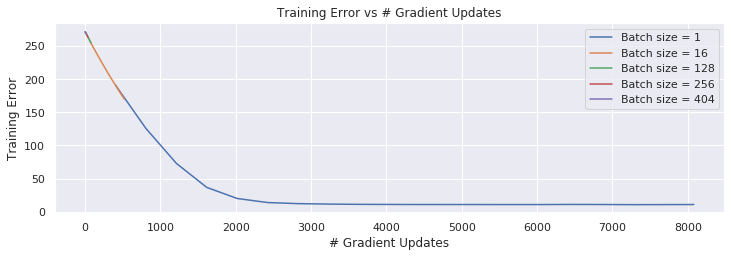

In [0]:
plt.figure(figsize=(12,3.5))
plt.plot(BZ1_absolute_error[2],BZ1_absolute_error[0],label='Batch size = 1')
plt.plot(BZ16_absolute_error[2],BZ16_absolute_error[0],label='Batch size = 16')
plt.plot(BZ128_absolute_error[2],BZ128_absolute_error[0],label='Batch size = 128')
plt.plot(BZ256_absolute_error[2],BZ256_absolute_error[0],label='Batch size = 256')
plt.plot(BZ404_absolute_error[2],BZ404_absolute_error[0],label='Batch size = 404')
#plt.xlim(0,8000)
plt.legend()
plt.title('Training Error vs # Gradient Updates')
plt.ylabel('Training Error')
plt.xlabel('# Gradient Updates')
plt.show()

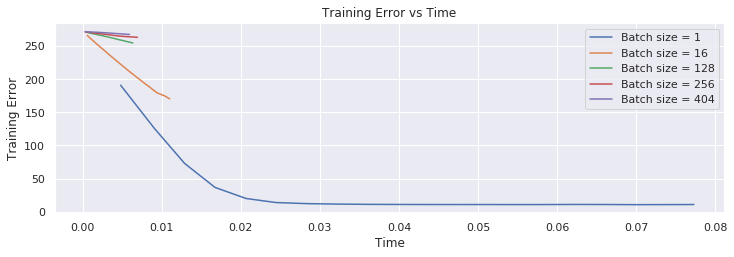

In [0]:
plt.figure(figsize=(12,3.5))
plt.plot(BZ1_absolute_error[1],BZ1_absolute_error[0],label='Batch size = 1')
plt.plot(BZ16_absolute_error[1],BZ16_absolute_error[0],label='Batch size = 16')
plt.plot(BZ128_absolute_error[1],BZ128_absolute_error[0],label='Batch size = 128')
plt.plot(BZ256_absolute_error[1],BZ256_absolute_error[0],label='Batch size = 256')
plt.plot(BZ404_absolute_error[1],BZ404_absolute_error[0],label='Batch size = 404')
#plt.xlim(0,0.10)
plt.legend()
plt.title('Training Error vs Time')
plt.ylabel('Training Error')
plt.xlabel('Time')
plt.show()

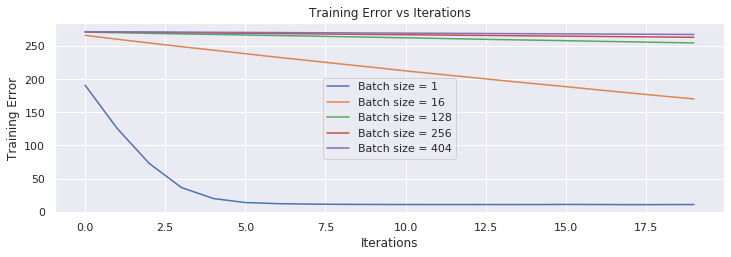

In [0]:
plt.figure(figsize=(12,3.5))
plt.plot(BZ1_absolute_error[3],BZ1_absolute_error[0],label='Batch size = 1')
plt.plot(BZ16_absolute_error[3],BZ16_absolute_error[0],label='Batch size = 16')
plt.plot(BZ128_absolute_error[3],BZ128_absolute_error[0],label='Batch size = 128')
plt.plot(BZ256_absolute_error[3],BZ256_absolute_error[0],label='Batch size = 256')
plt.plot(BZ404_absolute_error[3],BZ404_absolute_error[0],label='Batch size = 404')
#plt.xlim(0,20)
plt.legend()
plt.title('Training Error vs Iterations')
plt.ylabel('Training Error')
plt.xlabel('Iterations')
plt.show()

It is easier to train with mean squared error. When we use absolute error to train, in terms of both # gradient updates and time, it takes longer to converge, even we use the learning rate of 0.02, which is faster than 0.01. Therefore, it is easier to train with squared error. (In terms of performance, squared error(lr=0.01) > absolute error(lr=0.02) > absolute error(lr=0.01).)

**Thanks for your help and support!!! Have a wonderful holiday and Merry Christmas!**

### Question 7 (Optional)

1. Does the model perform better if polynomial features are added (Use sklearn.preprocessing.PolynomialFeatures to test it out).


2. Does the optimal value of λ (regularization constant) change with this new set of features added.

## References

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

Author: Parth Jaggi